# Import the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Data collection and Analysis

In [ ]:
# loading dataset from csv file to a pandas data frame.
df = pd.read_excel("C:/Users/rakes/Desktop/python/odin/ML1001/Health_insurance_cost.xlsx")

In [ ]:
# first 5 rows of the dataframe
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
# getting some information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Categorical Features:
- gender
- smoking_status
- location

In [ ]:
#checking for missing values
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<AxesSubplot:xlabel='health_insurance_price', ylabel='Count'>

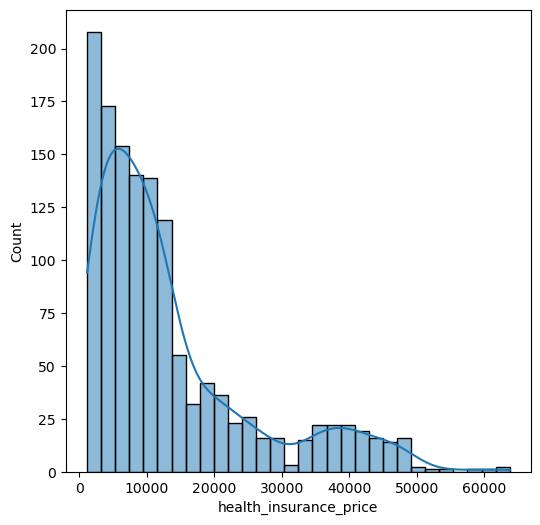

In [ ]:
# Handling missing values
# Analyse the distribution of data in the missing value column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.health_insurance_price,kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

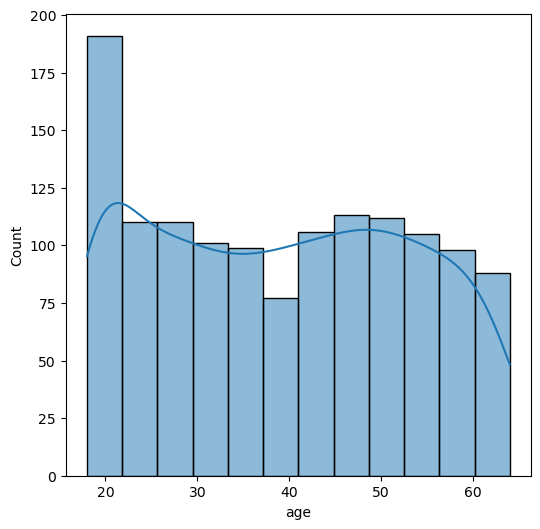

In [ ]:
# Analyse the distribution of data in Age column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.age,kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

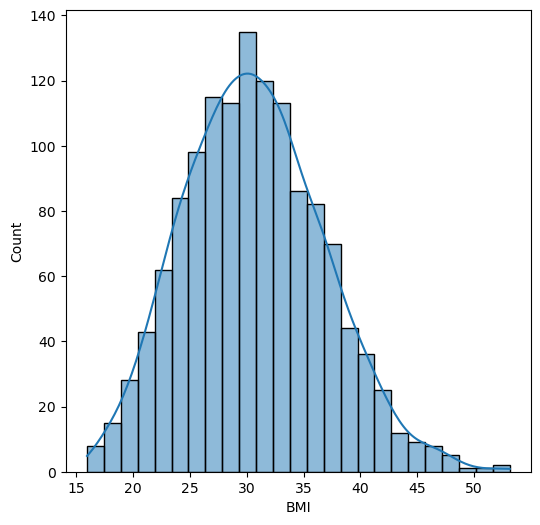

In [ ]:
# Analyse the distribution of data in Age column
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(df.BMI,kde=True)

- In this datframe of BMI and Age are Symmetrical and Uniform data presents so we can impute mean value for the miss data.
- But in Heath_Insurance_Price has Right Skewed data so missing value is replace with median value.

In [ ]:
#Impute median value in Health_insurance_price

df['health_insurance_price'].fillna(df['health_insurance_price'].median(),inplace=True)

In [ ]:
# Replace mean value with Missing value of Age and BMI columns.

df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
# Checking missing values after imputation.

df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520


# Data Analysis

In [ ]:
# Data Analysis

df.describe()

,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.166412,30.638217,1.094918,13262.718310
std,13.907422,6.057517,1.205493,12104.666613
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.166412,30.495000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


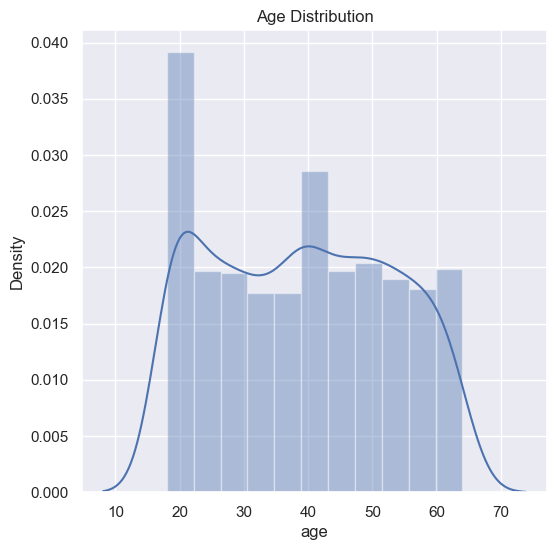

In [ ]:
# distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

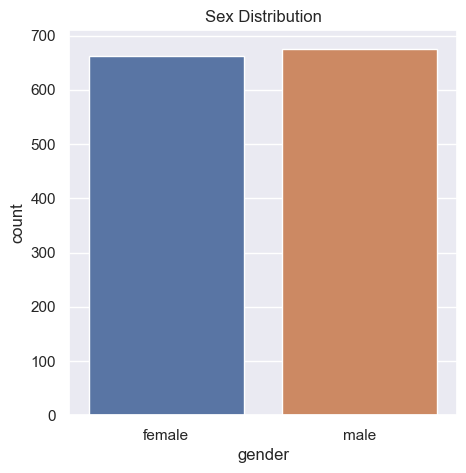

In [ ]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data = df)
plt.title('Sex Distribution')
plt.show()

In [ ]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

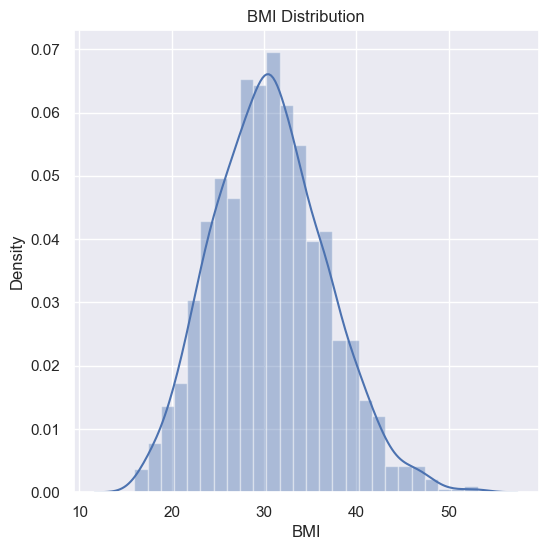

In [ ]:
# BMI distribution

plt.figure(figsize=(6,6))
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range --> 18.5 to 24.9
So here we noticed that more number of people are outside the BMI range so it can affect the insurance_price cost.

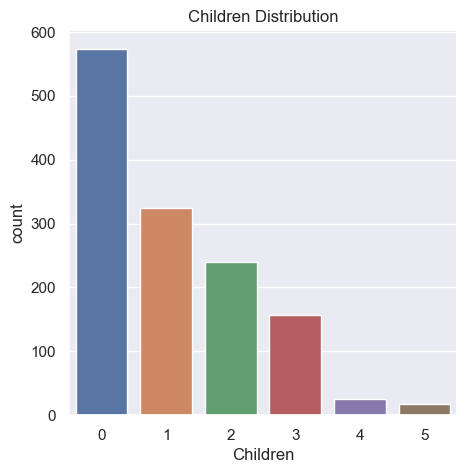

In [ ]:
# Distribution of Children 

plt.figure(figsize=(5,5))
sns.countplot(x='Children', data = df)
plt.title('Children Distribution')
plt.show()

In [ ]:
df['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

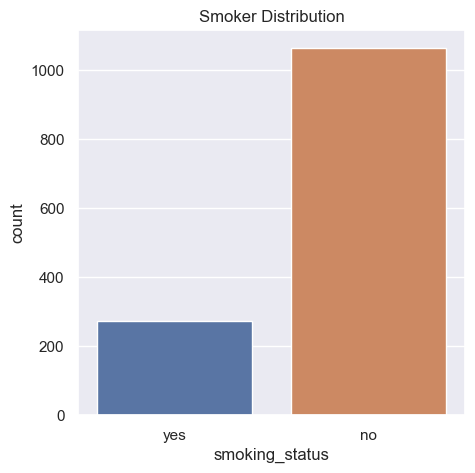

In [ ]:
# Smoker Column

plt.figure(figsize=(5,5))
sns.countplot(x='smoking_status', data = df)
plt.title('Smoker Distribution')
plt.show()

In [ ]:
df['smoking_status'].value_counts()

no     1064
yes     274
Name: smoking_status, dtype: int64

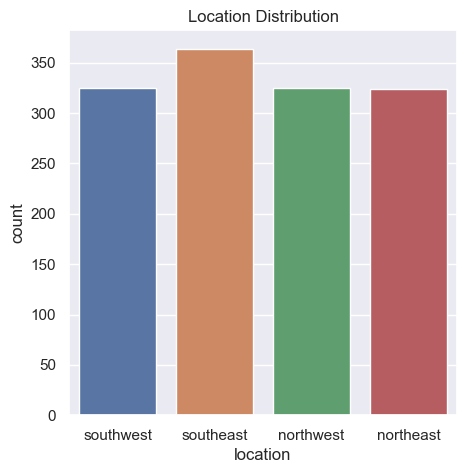

In [ ]:
# Location column
plt.figure(figsize=(5,5))
sns.countplot(x='location', data = df)
plt.title('Location Distribution')
plt.show()

In [ ]:
df['location'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

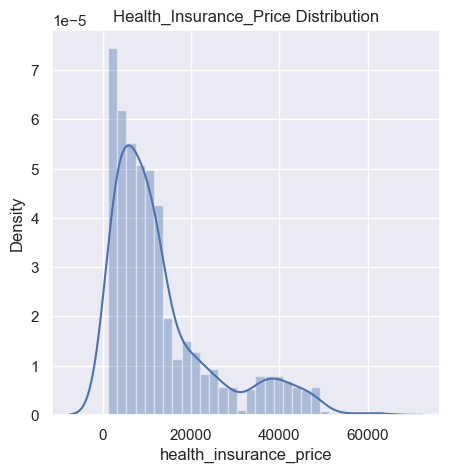

In [ ]:
# Health_Insurance_Price column

plt.figure(figsize=(5,5))
sns.distplot(df['health_insurance_price'])
plt.title('Health_Insurance_Price Distribution')
plt.show()


# Bivariate and MultiVariate Analysis

<AxesSubplot:xlabel='location', ylabel='health_insurance_price'>

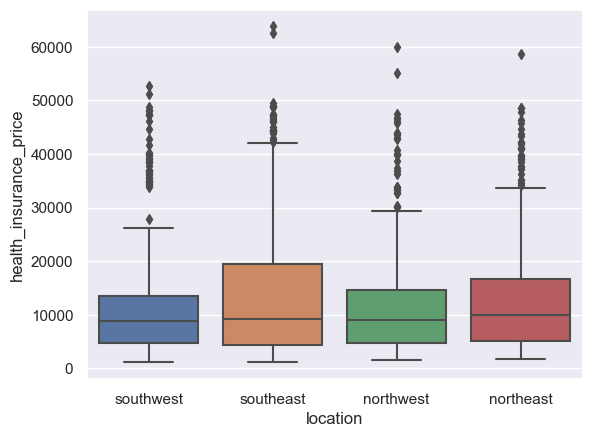

In [ ]:
#Analysis between Location and Price
sns.boxplot(data=df,x='location',y='health_insurance_price')

- From this above figure we can say location does not have more impact on Medical charges.

<AxesSubplot:xlabel='smoking_status', ylabel='health_insurance_price'>

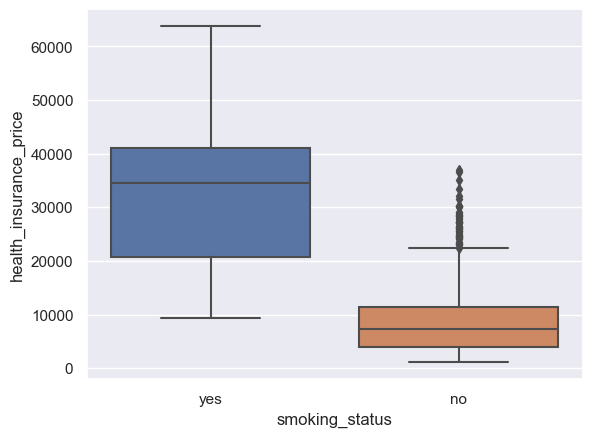

In [ ]:
# Boxplot of medical charges by smoking status
sns.boxplot(data=df,x='smoking_status',y='health_insurance_price')

- From above this figure we can say Smoker spends lot more cost on medical charges.

<AxesSubplot:xlabel='gender', ylabel='health_insurance_price'>

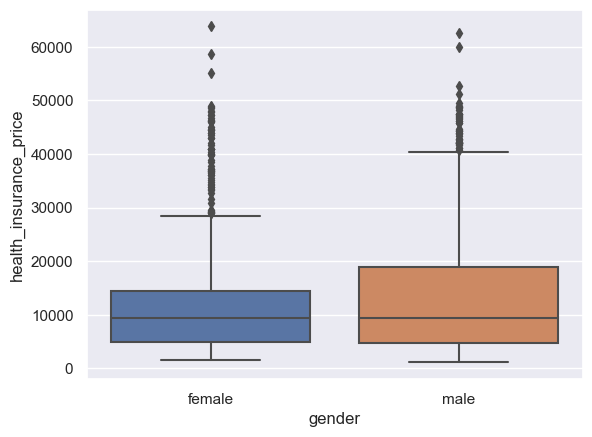

In [ ]:
# Boxplot of medical charges per gender

sns.boxplot(data=df,x='gender',y='health_insurance_price')

- From above this figure we can say Charges are not much affected by gender.

<AxesSubplot:xlabel='Children', ylabel='health_insurance_price'>

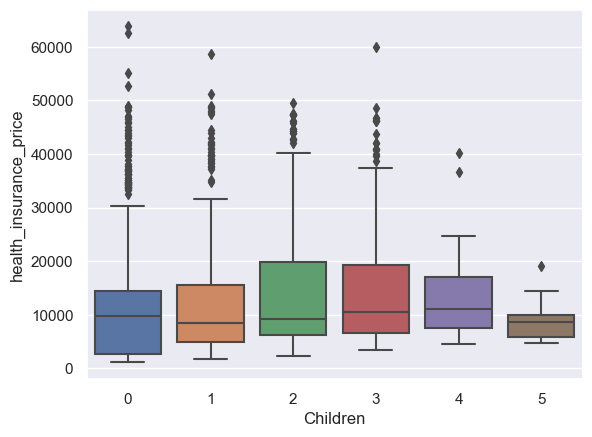

In [ ]:
# Boxplot of medical charges per children

sns.boxplot(data=df,x='Children',y='health_insurance_price')

- People  with  two  children  have  more  medical expenses. In contrast, People with  Five children have fewer expenses.

<AxesSubplot:xlabel='age', ylabel='health_insurance_price'>

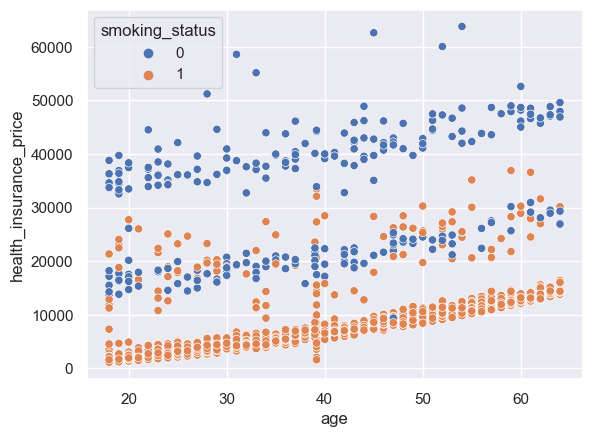

In [ ]:
# Relationship between "age" and "charges" using a scatter plot.

sns.scatterplot(data=df,x='age',y='health_insurance_price',hue='smoking_status')

- The general trend seems to be that medical charges increase with age, Smoker also spends highest medical charges.

# Data Pre_processing

In [ ]:
# Encoding the categorical Feature

In [ ]:
# Encoding Gender column
df.replace({'gender':{'male':0,'female':1}},inplace = True)

# Encoding Smoker column
df.replace({'smoking_status':{'yes':0,'no':1}},inplace = True)

# Encoding location column
df.replace({'location':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [ ]:
# Checking the data After encoding.
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,30.638217,0,0,1,16884.92400
1,18.0,0,33.770000,1,1,0,1725.55230
2,28.0,0,33.000000,3,1,0,4449.46200
3,33.0,0,22.705000,0,1,3,21984.47061
4,32.0,0,28.880000,0,1,3,3866.85520


<AxesSubplot:>

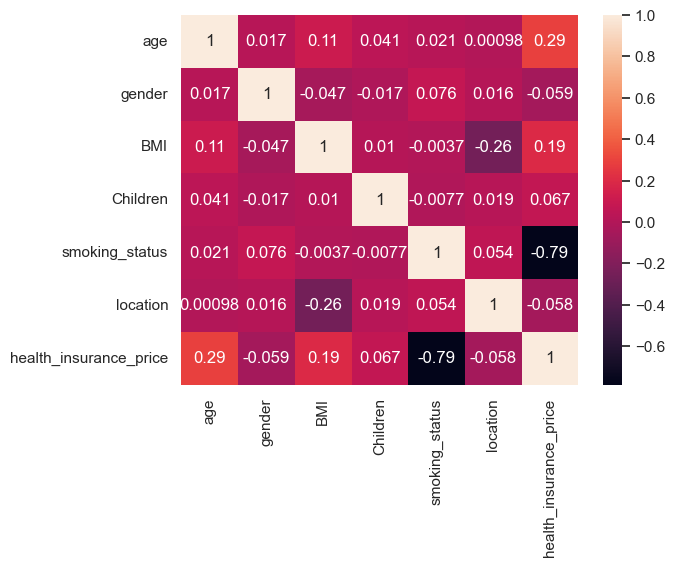

In [ ]:
#Correlation between Variables
sns.heatmap(df.corr(),annot=True)

- IN above fig. Shows that variables most influence charges are Smoker,Age and BMI

# Splitting the Features and Target

In [ ]:
X = df.drop(columns ='health_insurance_price', axis=1)
Y = df['health_insurance_price']

In [ ]:
print(X)

       age  gender        BMI  Children  smoking_status  location
0     19.0       1  30.638217         0               0         1
1     18.0       0  33.770000         1               1         0
2     28.0       0  33.000000         3               1         0
3     33.0       0  22.705000         0               1         3
4     32.0       0  28.880000         0               1         3
...    ...     ...        ...       ...             ...       ...
1333  50.0       0  30.970000         3               1         3
1334  18.0       1  31.920000         0               1         2
1335  18.0       1  36.850000         0               1         0
1336  21.0       1  25.800000         0               1         1
1337  61.0       1  29.070000         0               0         3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64


# Splitting the Training data and Testing Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [ ]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#loading the linear Regression Model
lr = LinearRegression()
lr.fit(X_train,Y_train)
#loading SVR
svm = SVR()
svm.fit(X_train,Y_train)
#loading randomforest regressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
#loading GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

# Prediction on dataset

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual': Y_test,'Lr': y_pred1,'SVM':y_pred2,'Rf':y_pred3,'Gr':y_pred3})

In [ ]:
df1

,Actual,Lr,SVM,Rf,Gr
17,2395.17155,1703.806856,9223.743021,4869.017937,4869.017937
1091,11286.53870,11501.106956,9403.188405,11768.691143,11768.691143
273,9617.66245,10078.169516,9373.155891,14697.703474,14697.703474
270,1719.43630,2461.546637,9211.282511,4375.321836,4375.321836
874,8891.13950,7927.328191,9332.101778,9078.742383,9078.742383
...,...,...,...,...,...
232,1727.78500,-1436.951305,9218.631772,2054.646659,2054.646659
323,11566.30055,15607.237724,9414.527505,15286.924204,15286.924204
1337,29141.36030,36733.565650,9430.211287,28874.596142,28874.596142
1066,8978.18510,12972.527642,9365.648418,10495.681462,10495.681462


# Compare performance visually

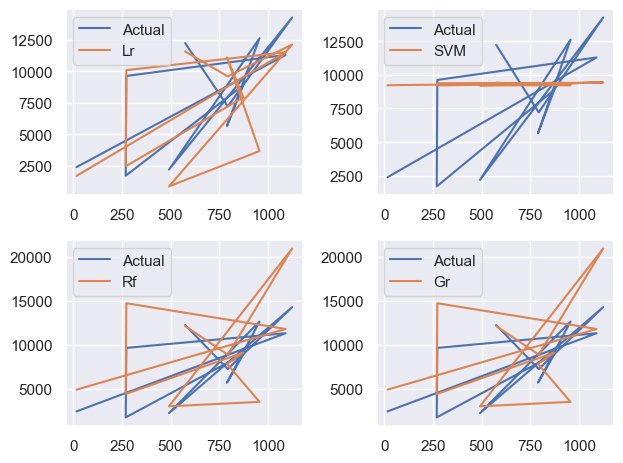

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Rf'].iloc[0:11],label='Rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Gr'].iloc[0:11],label='Gr')
plt.legend()

plt.tight_layout()
plt.legend()

# Evaluating algorithm

In [ ]:
from sklearn import metrics

In [ ]:
# Finding R-Squared value

score1 = metrics.r2_score(Y_test,y_pred1)
score2 = metrics.r2_score(Y_test,y_pred2)
score3 = metrics.r2_score(Y_test,y_pred3)
score4 = metrics.r2_score(Y_test,y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.7438520416531675 -0.07924737825526029 0.8414487287716615 0.8651170003364428


In [ ]:
# Finding Mean_Absolute_Error(MAE)

s1 = metrics.mean_absolute_error(Y_test,y_pred1)
s2 = metrics.mean_absolute_error(Y_test,y_pred2)
s3 = metrics.mean_absolute_error(Y_test,y_pred3)
s4 = metrics.mean_absolute_error(Y_test,y_pred4)


In [ ]:
print(s1,s2,s3,s4)

4253.419909825628 8468.763008868329 2733.5711337954863 2440.422826534496


In [ ]:
# Finding Root_Mean_Squared_Error(RMSE)

rms1 = metrics.mean_squared_error(Y_test,y_pred1,squared=False)
rms2 = metrics.mean_squared_error(Y_test,y_pred2,squared=False)
rms3 = metrics.mean_squared_error(Y_test,y_pred3,squared=False)
rms4 = metrics.mean_squared_error(Y_test,y_pred4,squared=False)

In [ ]:
print(rms1,rms2,rms3,rms4)

6202.297599494997 12731.150514172941 4879.687561117471 4500.759007159784


# MODEL PERFORMANCE

Algorithm used                 MAE            RMSE           R-squared 

LinearRegression              4253.4199      6202.2975       0.7438

SVR                           8468.7630      12731.1505      -0.0792      

RandomForestRegressor         2733.5711      4879.6875       0.8414

GredianBoostingRegressor      2440.4228      4500.7590       0.8651





 *From above analysis we found that gredianBoostingRegressor is the best model for this dataset. Before production,It is good practice to train our model for the entire dataset.*

In [ ]:
#predict charges for new customer
data = {'age' : 40,
        'gender' : 1,
        'BMI' : 40.30,
        'Children' : 4,
        'smoking_status' : 1,
        'location' : 2}

In [ ]:
df3 = pd.DataFrame(data,index=[0])
df3

,age,gender,BMI,Children,smoking_status,location
0,40,1,40.3,4,1,2


In [ ]:
# on test dataset predict charges for new customer.
new_pred = gr.predict(df3)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  11143.038152117055


In [ ]:
#Train our model for entire dataset
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [ ]:
#predict charges for new customer
new_pred = gr.predict(df3)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  11993.178399490744
